# Linear Regression

## You will implement linear regression with one variable to predict profits for a food truck.

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities, and you have data for profits and populations from the cities.

You would like to use this data to help you select which city to expand to next.

The first column is the population of a city, and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss


In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
# Load data from 'data.txt'
data = np.loadtxt('data.txt', dtype=str)
m, n = data.shape

In [68]:
# Extract features and target
population = data[:, 0].astype(float)
profit = data[:, 1].astype(float)

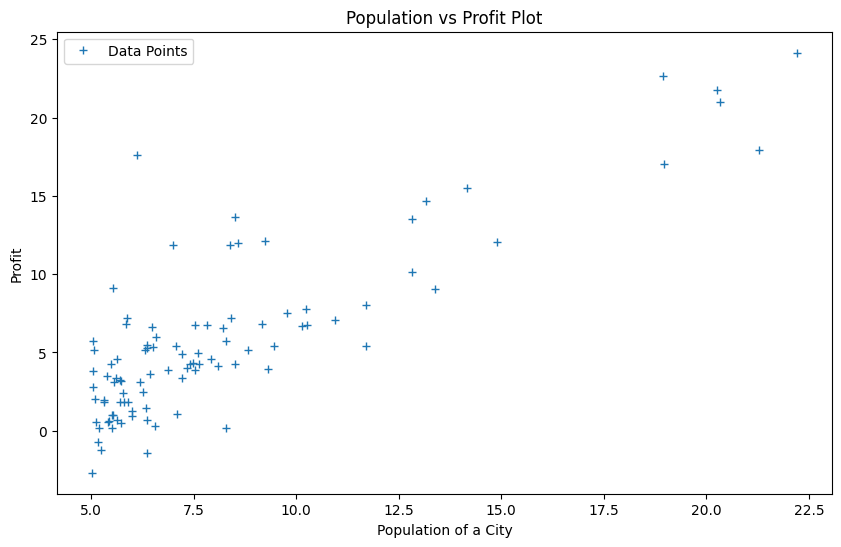

In [69]:
# Plot the data points
plt.figure(figsize=(10, 6))
plt.plot(population, profit, '+', label='Data Points')
plt.xlabel('Population of a City')
plt.ylabel('Profit')
plt.title('Population vs Profit Plot')
plt.legend()
plt.show()


In [70]:
# Initialize linear regression parameters and features
theta = np.zeros((2, 1))
X = np.ones((m, 2))
X[:, 1] = population
y = profit.reshape(-1, 1)

In [71]:
# Gradient descent settings
alpha = 0.01
num_iterations = 1500
cost_history = np.zeros((num_iterations, 1))
iteration_history = np.arange(num_iterations).reshape(-1, 1)

In [72]:
# Gradient Descent
for i in range(num_iterations):
    error = X.dot(theta) - y
    theta = theta - (alpha / m) * (X.T.dot(error))
    cost = np.sum(np.square(error)) / (2 * m)
    cost_history[i] = cost

In [73]:
# Print the learned parameters and final cost
print(f"Learned theta: {theta}")
final_cost = cost_history[-1][0]
print(f"Final Cost: {final_cost:.2f}")

Learned theta: [[-3.63029144]
 [ 1.16636235]]
Final Cost: 4.48


In [74]:
# Prediction examples
prediction_1 = np.array([1, 3.5]).dot(theta)[0] * 10000
prediction_2 = np.array([1, 7]).dot(theta)[0] * 10000
print(f"Prediction for population 35,000: ${prediction_1:.2f}")
print(f"Prediction for population 70,000: ${prediction_2:.2f}")


Prediction for population 35,000: $4519.77
Prediction for population 70,000: $45342.45


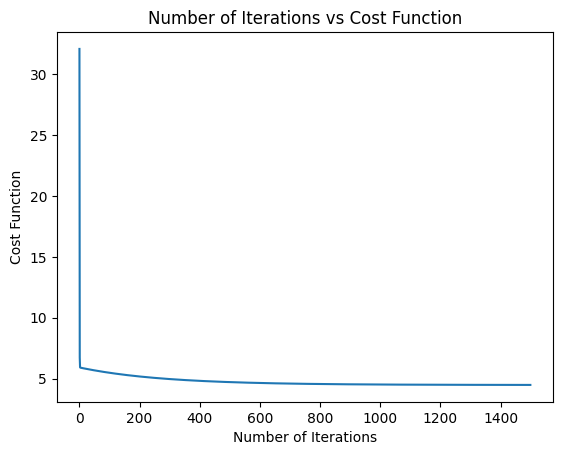

In [75]:
# Plot cost function over iterations
plt.figure()
plt.plot(iteration_history, cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function')
plt.title('Number of Iterations vs Cost Function')
plt.show()

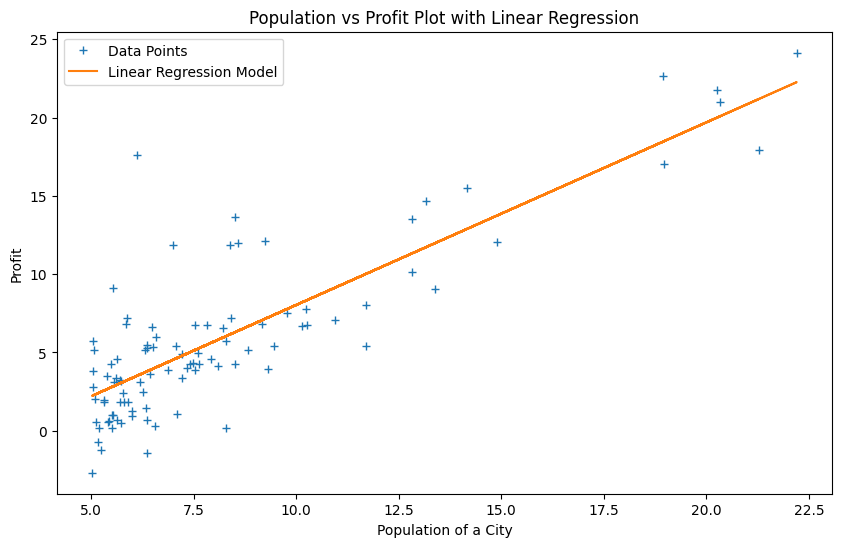

In [76]:
# Plot the linear regression model
plt.figure(figsize=(10, 6))
plt.plot(population, profit, '+', label='Data Points')
plt.plot(population, X.dot(theta), label='Linear Regression Model')
plt.xlabel('Population of a City')
plt.ylabel('Profit')
plt.title('Population vs Profit Plot with Linear Regression')
plt.legend()
plt.show()